In [51]:
import numpy as np 
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

import os

plt.style.use('ggplot')


In [52]:
url = 'https://raw.githubusercontent.com/vishesh008/Malware-Detection-Using-Machine-Learning/main/dataset_malwares.csv'
data = pd.read_csv(url)
data.head()



,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


### Data Information


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [54]:
used_data = data.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)

### **Distribution according to not harmful and harmful(Malware)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Not Harmful'), Text(0, 0, 'Malware')]

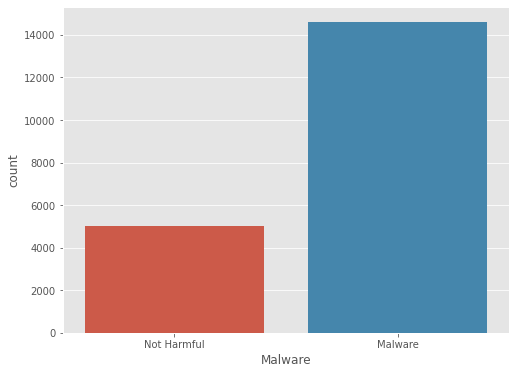

In [55]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(data['Malware'])
ax.set_xticklabels(['Not Harmful', 'Malware'])

Splitting the data into traning and test dataset

## **FEATURES SELECTIONS**

In [56]:
from sklearn.feature_selection import SelectFromModel
import sklearn.ensemble as ske
fsel = ske.ExtraTreesClassifier().fit(used_data, data['Malware'])
model = SelectFromModel(fsel, prefit=True)
X_new = model.transform(used_data)
nb_features = X_new.shape[1]
indices = np.argsort(fsel.feature_importances_)[::-1][:nb_features]

std = np.std([tree.feature_importances_ for tree in fsel.estimators_],
             axis=0)

importances = fsel.feature_importances_
for f in range(nb_features):
    print("%d. feature %s (%f)" % (f + 1, data.columns[2+indices[f]], fsel.feature_importances_[indices[f]]))
features = []
for f in sorted(np.argsort(fsel.feature_importances_)[::-1][:nb_features]):
    features.append(data.columns[2+f])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


1. feature SizeOfOptionalHeader (0.144177)
2. feature MinorImageVersion (0.119901)
3. feature SizeOfImage (0.066887)
4. feature SectionMaxPointerData (0.065365)
5. feature Subsystem (0.054782)
6. feature MajorSubsystemVersion (0.052906)
7. feature BaseOfCode (0.049265)
8. feature Characteristics (0.039615)
9. feature MajorOperatingSystemVersion (0.039223)
10. feature FileAlignment (0.037308)
11. feature DllCharacteristics (0.024288)
12. feature Magic (0.023989)
13. feature ImageBase (0.020834)
14. feature SectionAlignment (0.019844)
15. feature e_ss (0.018111)
16. feature NumberOfRvaAndSizes (0.017046)
17. feature SectionMaxChar (0.016144)
18. feature SuspiciousNameSection (0.015065)


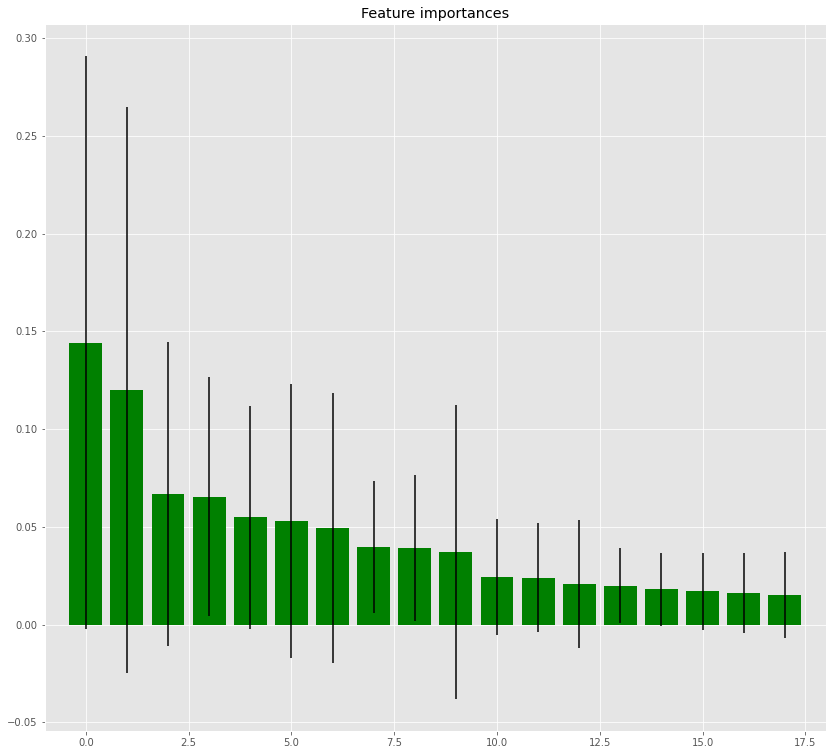

In [57]:
x_train = X_new
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")

plt.xlim([-1, x_train.shape[1]])
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, data['Malware'], test_size=0.2, random_state=0)

### Creating Model using RandonForestClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier



rfc = RandomForestClassifier(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16)
rfc.fit(X_train, y_train)












RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

Text(0, 0.5, 'Error Rate')

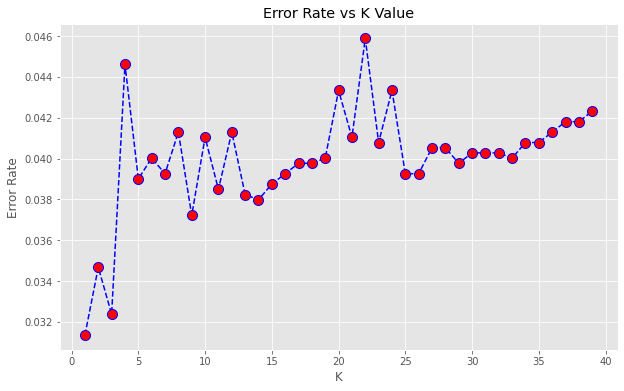

In [60]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,linestyle='--',color='blue', marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Results

In [61]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)




rfc = RandomForestClassifier(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)



## **Result for Simple-KNN**

In [62]:
from sklearn import metrics
ac2= metrics.accuracy_score(y_test,y_pred2)
ac2

0.9686464440479226

## **Result for RandomForest**

In [63]:
ac= metrics.accuracy_score(y_test,y_pred)
ac

0.9839408615855213